In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

# Gathering data

In [4]:
#csv file
df = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
#tsv file
a = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [6]:
with open('image-predictions.tsv' , 'w')as f:
   f.write(a.text)

In [7]:
data = pd.read_csv('image-predictions.tsv' , sep = '\t')

In [8]:
data.to_csv('image.csv')

In [9]:
#json file
# I got the json file from the downloads in the classroom
data_json = pd.read_json('tweet-json' , lines = True)

# functions

In [10]:
def scan(dataframe):
  print('these are the main information')
  print()
  print(dataframe.info())
  print()
  print('there are ' , dataframe.duplicated().sum(), 'duplicates')
  print()
  print('these are the nan values per column ',  '\n', dataframe.isna().sum() )
  print()
  print('numeric columns information', '\n' , dataframe.describe())

In [11]:
def remove(df, col, values):
    return df[~df[col].isin(values)]

# Assessing step

## csv assessing

### quality issues
- the rating_numerator is larger than the rating denominator
- timestamp must be in datetime type
- some names in the 'names' column are not valid like 'an', 'a', 'the' ,'all' ,etc
- handling nan values
 - replace with unknown in name and expanded urls
- remove retweets and replies
 - the retweets are the rows which have a value in the retweet_status_id
 - the replies are the rows which have a value in the in_reply_to_status_id

 ### tidiness issues
  - remove useless columns `in_reply_to_status_id , in_reply_to_user_id` because we will remove the replies ,
 `retweeted_status_id ,retweeted_status_user_id , retweeted_status_timestamp` because we will remove retweets
 `source` won`t be used in the analysis
 - remove the denominator column and write its value which is 10 in the numerator column name
 - merge puppo , pupper , floofer , doggo in one column called 'age'


In [12]:
scan(df)

these are the main information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  d

In [13]:
df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune

In [14]:
df.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


In [15]:
df.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,NaN,NaN,NaN,NaN,NaN
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,NaN,NaN,NaN,NaN,NaN
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,NaN,NaN,NaN,NaN,NaN
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,NaN,NaN,NaN,NaN,NaN
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,NaN,NaN,NaN,NaN,NaN
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,NaN,NaN,NaN,NaN,NaN
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,NaN,NaN,NaN,NaN,NaN
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,NaN,NaN,NaN,NaN,NaN
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,NaN,NaN,NaN,NaN,NaN
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'tweet_id'}>,
        <Axes: title={'center': 'in_reply_to_status_id'}>,
        <Axes: title={'center': 'in_reply_to_user_id'}>],
       [<Axes: title={'center': 'retweeted_status_id'}>,
        <Axes: title={'center': 'retweeted_status_user_id'}>,
        <Axes: title={'center': 'rating_numerator'}>],
       [<Axes: title={'center': 'rating_denominator'}>, <Axes: >,
        <Axes: >]], dtype=object)

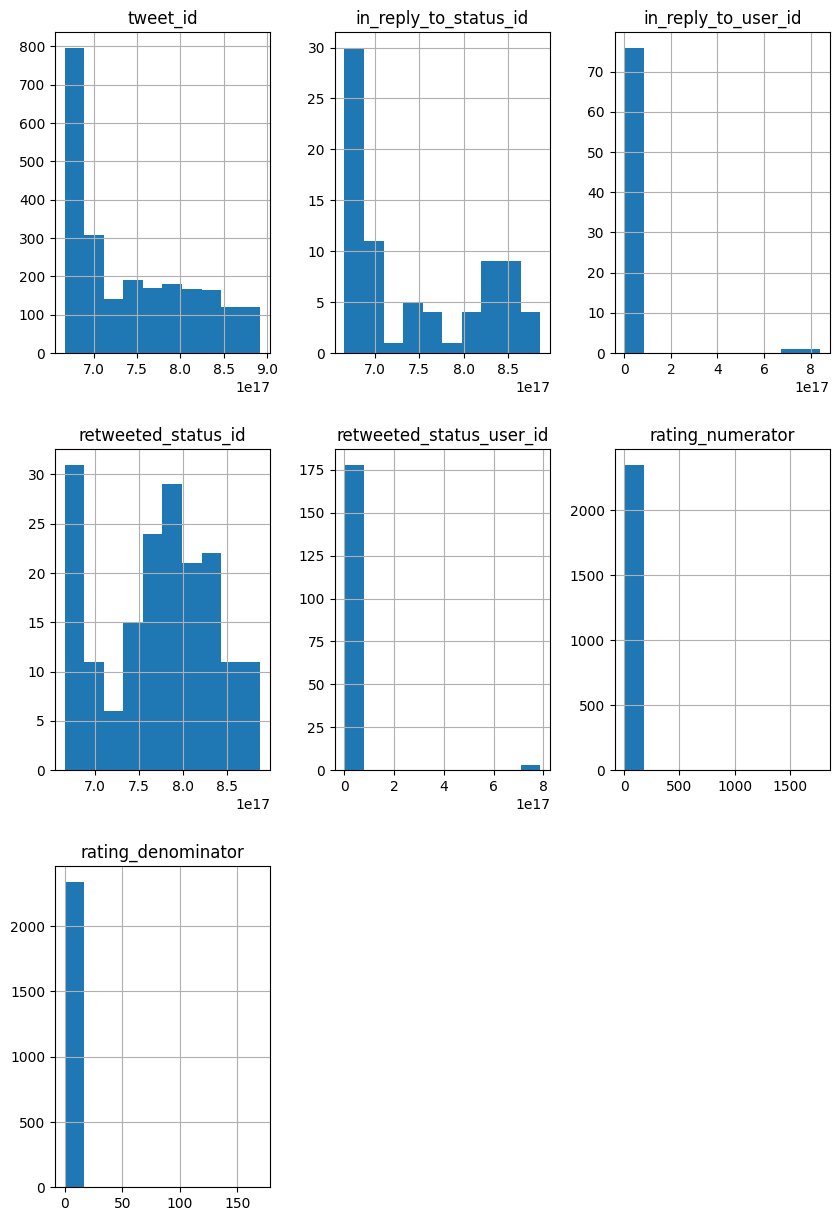

In [16]:
df.hist(figsize= (10,15))

In [17]:
df['in_reply_to_user_id'].unique()

array([           nan, 2.28118160e+09, 4.73844300e+07, 3.10544075e+09,
       1.64877600e+07, 7.75962000e+07, 4.19698384e+09, 1.80670967e+08,
       2.79280991e+08, 1.94351775e+08, 1.36157220e+07, 2.19550580e+07,
       8.40547864e+17, 2.89413118e+09, 2.62595760e+07, 3.05820820e+07,
       2.06837240e+07, 1.58285381e+09, 1.13211856e+08, 1.18563420e+07,
       2.91859009e+08, 2.91663050e+07, 7.30505014e+17, 1.58464070e+07,
       4.71729748e+09, 3.58972768e+08, 2.31910820e+09, 2.87854860e+07,
       1.19898851e+09, 4.67036706e+08, 1.63746780e+07, 2.14356580e+07])

## tsv assessing



### quality issues
- there are some columns include images not for dogs for example: hen , turtle
### tidiness issues
- rename the columns to be clear and understandable

In [18]:
data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
data.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [20]:
a = data[data['p1_dog'] == False]
b = a[a['p2_dog'] == False ]
c = b[b['p3_dog'] == False ]
c

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


## json assessing

### quality issues
- remove all retweets and replies and quoted tweets
- handle nan values
### tideness issues
- remove unwanted columns
- rename the columns to be clear and understandable and the column id to 'retweet_id' to match other datasets

In [21]:
data_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [22]:
data_json['place'].value_counts() # We can`t understand anything from this column so it`s better to be deleted

,count
place,
"{'id': '7356b662670b2c31', 'url': 'https://api.twitter.com/1.1/geo/id/7356b662670b2c31.json', 'place_type': 'city', 'name': 'Clifton', 'full_name': 'Clifton, NJ', 'country_code': 'US', 'country': 'United States', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-74.1977277, 40.82028], [-74.118533, 40.82028], [-74.118533, 40.899384], [-74.1977277, 40.899384]]]}, 'attributes': {}}",1


In [23]:
# we can`t use the scan function here because of columns include lists
data_json.info()   # some columns are fully nans so they must be removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [24]:
data_json['lang'].unique() # all the lanuages are correct

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

# Cleaning Step

## csv cleaning

In [25]:
#copying the main dataset
cleaned_df = df.copy()

In [26]:
# 1-the rating_numerator is larger than the rating denominator
cleaned_df['rating_numerator'] = cleaned_df['rating_numerator'].apply(lambda x : 10 if x > 10 else x)

In [27]:
cleaned_df['rating_numerator'].value_counts() # successfully changed

,count
rating_numerator,
10,1916
9,158
8,102
7,55
5,37
6,32
3,19
4,17
1,9


In [28]:
# 2-timestamp must be in datetime type
cleaned_df['timestamp'] = pd.to_datetime(cleaned_df['timestamp'])

In [29]:
cleaned_df['timestamp'].dtype

datetime64[ns, UTC]

In [30]:
# 3-some names in the 'names' column are not valid like 'an', 'a', 'the' ,'all' ,etc
cleaned_df = remove(cleaned_df , 'name' , [ 'such', 'a', 'quite', 'not', 'one', 'mad', 'an',
    'very', 'O', 'just', 'my', 'his', 'Bookstore', 'getting',
    'actually', 'this', 'unacceptable', 'all', 'old','the','nan'
]
)

In [31]:
cleaned_df['name'].isin([ 'such', 'a', 'quite', 'not', 'one', 'mad', 'an',
    'very', 'O', 'just', 'my', 'his', 'Bookstore', 'getting',
    'actually', 'this', 'unacceptable', 'all', 'old','the','nan'
])    #changed successfully

,name
0,False
1,False
2,False
3,False
4,False
...,...
2342,False
2343,False
2344,False
2351,False


In [32]:
# 4-handling nan values replace with unknown in name and expanded urls
cleaned_df[['name', 'expanded_urls']] = cleaned_df[['name', 'expanded_urls']].fillna('unknown')

In [33]:
cleaned_df.info() #successfully changed

<class 'pandas.core.frame.DataFrame'>
Index: 2252 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2252 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2252 non-null   datetime64[ns, UTC]
 4   source                      2252 non-null   object             
 5   text                        2252 non-null   object             
 6   retweeted_status_id         176 non-null    float64            
 7   retweeted_status_user_id    176 non-null    float64            
 8   retweeted_status_timestamp  176 non-null    object             
 9   expanded_urls               2252 non-null   object             
 10  rating_numerator            2252 non-null   int64              
 

In [34]:
# 5-remove retweets and replies
cleaned_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,10,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,10,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,10,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,10,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,10,10,Franklin,NaN,NaN,NaN,NaN


In [35]:
cleaned_df = cleaned_df[cleaned_df['in_reply_to_status_id'].isna()]

In [36]:
cleaned_df = cleaned_df[cleaned_df['retweeted_status_id'].isna()]

In [37]:
cleaned_df.info() # now we have just tweets , no replies , and no retweets

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1998 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   1998 non-null   datetime64[ns, UTC]
 4   source                      1998 non-null   object             
 5   text                        1998 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1998 non-null   object             
 10  rating_numerator            1998 non-null   int64              
 

In [38]:
#tideness issues : 1-remove the columns of retweets and replies
cleaned_df = cleaned_df.drop(['in_reply_to_status_id'
 ,'in_reply_to_user_id' ,'retweeted_status_id'
  ,'retweeted_status_user_id' ,'retweeted_status_timestamp'] , axis = 1)

In [39]:
# 2-remove the source column which won`t be used
cleaned_df = cleaned_df.drop('source' , axis = 1)

In [40]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1998 non-null   int64              
 1   timestamp           1998 non-null   datetime64[ns, UTC]
 2   text                1998 non-null   object             
 3   expanded_urls       1998 non-null   object             
 4   rating_numerator    1998 non-null   int64              
 5   rating_denominator  1998 non-null   int64              
 6   name                1998 non-null   object             
 7   doggo               80 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              218 non-null    object             
 10  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 187.3+ KB


In [41]:
# 3-remove the denominator column and write its value  in the numerator column
cleaned_df.drop('rating_denominator' , axis = 1 , inplace = True)
cleaned_df.rename(columns = {'rating_numerator': 'rating_of_10'} , inplace = True)

In [42]:
# 4-merge puppo , pupper , floofer , doggo in one column called 'age'
cleaned_df[['doggo' , 'floofer' , 'pupper' , 'puppo']] = cleaned_df[['doggo' , 'floofer' , 'pupper' , 'puppo']].fillna(' ')

In [43]:
cleaned_df['age'] = cleaned_df[['doggo' , 'floofer' , 'pupper' , 'puppo']].agg(''.join , axis = 1)

In [44]:
cleaned_df['age'].value_counts() #we need to exploid these columns with two

,count
age,
,1676
pupper,210
doggo,70
puppo,23
floofer,9
doggo pupper,8
doggo puppo,1
doggofloofer,1


In [45]:
cleaned_df['age'] = cleaned_df['age'].str.split(' ')

In [46]:
cleaned_df =cleaned_df.explode('age')

In [47]:
cleaned_df = remove(cleaned_df , 'age' , ['', 'doggofloofer'])

In [48]:
cleaned_df['age'].unique()  #changed

array(['doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [49]:
cleaned_df['age'] = cleaned_df['age'].replace('    ', '__')
# I used underscore instead of 'unknown' because it`s visualy easier to read in the dataset and we will be able to see the values easily
cleaned_df = cleaned_df.drop(columns =['doggo', 'floofer' ,'pupper' ,'puppo'] , axis = 1)

In [50]:
# final checking
scan(cleaned_df)

these are the main information

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 9 to 2017
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       330 non-null    int64              
 1   timestamp      330 non-null    datetime64[ns, UTC]
 2   text           330 non-null    object             
 3   expanded_urls  330 non-null    object             
 4   rating_of_10   330 non-null    int64              
 5   name           330 non-null    object             
 6   age            330 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 20.6+ KB
None

there are  0 duplicates

these are the nan values per column  
 tweet_id         0
timestamp        0
text             0
expanded_urls    0
rating_of_10     0
name             0
age              0
dtype: int64

numeric columns information 
            tweet_id  rating_of_10
count  3

## tsv cleaning

In [51]:
cleaned_tsv = data.copy()

In [52]:
cleaned_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [53]:
# there are some columns include images not for dogs for example: hen , turtle
cleaned_tsv = cleaned_tsv[cleaned_tsv['p1_dog'] != False]
cleaned_tsv = cleaned_tsv[cleaned_tsv['p2_dog'] != False]
cleaned_tsv = cleaned_tsv[cleaned_tsv['p3_dog'] != False]

In [54]:
# manual checking for the urls
cleaned_tsv['jpg_url'].tail(50)

,jpg_url
2003,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg
2004,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg
2006,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg
2007,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg
2008,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg
2009,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg
2010,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg
2011,https://pbs.twimg.com/media/DDLdUrqXYAMOVzY.jpg
2014,https://pbs.twimg.com/ext_tw_video_thumb/87941...
2016,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg


In [55]:
# tideness issue: remove the columns which won`t be used in the analysis
cleaned_tsv = cleaned_tsv.drop(['p1_conf', 'p2_conf' , 'p3_conf'
                                ,'p1_dog' , 'p2_dog' , 'p3_dog'] , axis = 1)

In [56]:
cleaned_tsv.head()

,tweet_id,jpg_url,img_num,p1,p2,p3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,malinois,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,redbone,miniature_pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,Rottweiler,Doberman


In [57]:
# tideness issue: rename the columns to be clear and understandable
cleaned_tsv = cleaned_tsv.rename(columns = {
    'p1' : 'prediction1' ,
    'p2' : 'prediction2' ,
    'p3' : 'prediction3' ,
    'img_num' : 'num_of_img'
})

In [58]:
#final scan
scan(cleaned_tsv)

these are the main information

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 2073
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     1243 non-null   int64 
 1   jpg_url      1243 non-null   object
 2   num_of_img   1243 non-null   int64 
 3   prediction1  1243 non-null   object
 4   prediction2  1243 non-null   object
 5   prediction3  1243 non-null   object
dtypes: int64(2), object(4)
memory usage: 68.0+ KB
None

there are  0 duplicates

these are the nan values per column  
 tweet_id       0
jpg_url        0
num_of_img     0
prediction1    0
prediction2    0
prediction3    0
dtype: int64

numeric columns information 
            tweet_id   num_of_img
count  1.243000e+03  1243.000000
mean   7.438837e+17     1.226066
std    6.915303e+16     0.583920
min    6.660209e+17     1.000000
25%    6.791218e+17     1.000000
50%    7.199912e+17     1.000000
75%    8.022561e+17     1.000000
max    8

## json cleaning

In [59]:
cleaned_json = data_json.copy()

In [60]:
# 1-remove all retweets and replies and quoted tweets
cleaned_json = cleaned_json[cleaned_json['in_reply_to_status_id'].isna()]
cleaned_json = cleaned_json[cleaned_json['quoted_status_id'].isna()]
cleaned_json = cleaned_json[cleaned_json['retweeted_status'].isna()]
cleaned_json = cleaned_json[cleaned_json['is_quote_status'] == False]

In [61]:
#remove unwanted columns
#---columms with 0 and 1 non null must be removed
cleaned_json.drop(columns = ['in_reply_to_status_id' , 'in_reply_to_status_id_str'
                             , 'in_reply_to_user_id' , 'in_reply_to_user_id_str'
                             , 'in_reply_to_screen_name' , 'geo','coordinates',
                             'place' , 'contributors' , 'retweeted_status'
                             ,'quoted_status_id' ,'quoted_status_id_str'
                             ,'quoted_status' ,'is_quote_status' ,'id_str'
                             ,'display_text_range'
                             , 'truncated' ]
                  , inplace = True)

In [62]:
# 2- handle nan values   let`s fill it with mode
cleaned_json['possibly_sensitive'].mode()  #mode is 0

,possibly_sensitive
0,0.0


In [63]:
cleaned_json['possibly_sensitive_appealable'].mode()  #mode is 0

,possibly_sensitive_appealable
0,0.0


In [64]:
# the mode is zero for them both
cleaned_json.fillna(0 , inplace = True)

In [65]:
cleaned_json.drop(columns = ['entities' ,'extended_entities' ,'source' ,'user' ,'retweeted'], inplace = True)

In [66]:
cleaned_json.drop(columns = ['possibly_sensitive','possibly_sensitive_appealable'], inplace = True) #all their values are 0s

In [67]:
#rename the columns to be clear and understandable and the columns to match other datasets
cleaned_json = cleaned_json.rename(columns= {'id' : 'tweet_id' ,'lang' : 'language' , 'favorited': 'is_favorited' , 'created_at' : 'timestamp' ,'full_text' :'text'})

In [68]:
scan(cleaned_json)  #final scan....we removed too many columns but they won`t be necessary and it will be a part of a large merged dataset

these are the main information

<class 'pandas.core.frame.DataFrame'>
Index: 2068 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   timestamp       2068 non-null   datetime64[ns, UTC]
 1   tweet_id        2068 non-null   int64              
 2   text            2068 non-null   object             
 3   retweet_count   2068 non-null   int64              
 4   favorite_count  2068 non-null   int64              
 5   is_favorited    2068 non-null   bool               
 6   language        2068 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 115.1+ KB
None

there are  0 duplicates

these are the nan values per column  
 timestamp         0
tweet_id          0
text              0
retweet_count     0
favorite_count    0
is_favorited      0
language          0
dtype: int64

numeric columns information 
            twee

# merge dataframes

In [69]:
master_df = cleaned_df.merge(cleaned_tsv , on = 'tweet_id' , how = 'outer').dropna().merge(cleaned_json, on = ['tweet_id','timestamp' ,'text'] , how = 'outer')

In [70]:
master_df.info()  #new problems appear !!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2073 non-null   int64              
 1   timestamp       2073 non-null   datetime64[ns, UTC]
 2   text            2073 non-null   object             
 3   expanded_urls   186 non-null    object             
 4   rating_of_10    186 non-null    float64            
 5   name            186 non-null    object             
 6   age             186 non-null    object             
 7   jpg_url         186 non-null    object             
 8   num_of_img      186 non-null    float64            
 9   prediction1     186 non-null    object             
 10  prediction2     186 non-null    object             
 11  prediction3     186 non-null    object             
 12  retweet_count   2073 non-null   int64              
 13  favorite_count  2073 non-null   i

## fix the merged dataset

## Problems:
- handle nan values replace with unkown in object columns , replace with mean or mode in numerical columns
- edit columns datatypes floats to ints

In [71]:
#object nan handling
master_df.fillna({'timestamp' : 'unknown' ,'text' :'unknown',
                 'expanded_urls' : 'unknown','name' :'unknown','age' :'__'
                  ,'jpg_url' : 'no url given' ,'prediction1' :'not provided'
                  ,'prediction2' :'not provided'
                  ,'prediction3' :'not provided' ,'language' : 'not provided'} , inplace = True)

In [72]:
master_df.fillna({'rating_of_10' :int(master_df['rating_of_10'].mean()) , 'num_of_img' :int(master_df['num_of_img'].mode()),
                  'retweet_count':master_df['retweet_count'].mean(), 'favorite_count':int(master_df['favorite_count'].mean()),
                  }, inplace = True)

<ipython-input-72-7182dcb2002d>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  master_df.fillna({'rating_of_10' :int(master_df['rating_of_10'].mean()) , 'num_of_img' :int(master_df['num_of_img'].mode()),


In [73]:
#remove the is_favorited column won`t be used
master_df.drop('is_favorited' , axis = 1 , inplace = True)

In [74]:
#edit datatypes
master_df[['rating_of_10', 'num_of_img','retweet_count' ,'favorite_count']] = master_df[['rating_of_10' ,'num_of_img' ,'retweet_count' ,'favorite_count']].astype(int)

In [75]:
scan(master_df) #now we have our merged master dataset ready for analysis

these are the main information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2073 non-null   int64              
 1   timestamp       2073 non-null   datetime64[ns, UTC]
 2   text            2073 non-null   object             
 3   expanded_urls   2073 non-null   object             
 4   rating_of_10    2073 non-null   int64              
 5   name            2073 non-null   object             
 6   age             2073 non-null   object             
 7   jpg_url         2073 non-null   object             
 8   num_of_img      2073 non-null   int64              
 9   prediction1     2073 non-null   object             
 10  prediction2     2073 non-null   object             
 11  prediction3     2073 non-null   object             
 12  retweet_count   2073 non-null   int64              
 13  f

# Storing dataset

In [76]:
#saving the master dataset in the main dataset twitter_archive_master.csv
master_df.to_csv('twitter_archive_master.csv')

# Analyzing step
 - **questions**
  - 1. what factors affect the favourites counts
  - 2. most and least common dog names
  - 3. most and least common dog age stages






array([[<Axes: title={'center': 'tweet_id'}>,
        <Axes: title={'center': 'timestamp'}>],
       [<Axes: title={'center': 'rating_of_10'}>,
        <Axes: title={'center': 'num_of_img'}>],
       [<Axes: title={'center': 'retweet_count'}>,
        <Axes: title={'center': 'favorite_count'}>]], dtype=object)

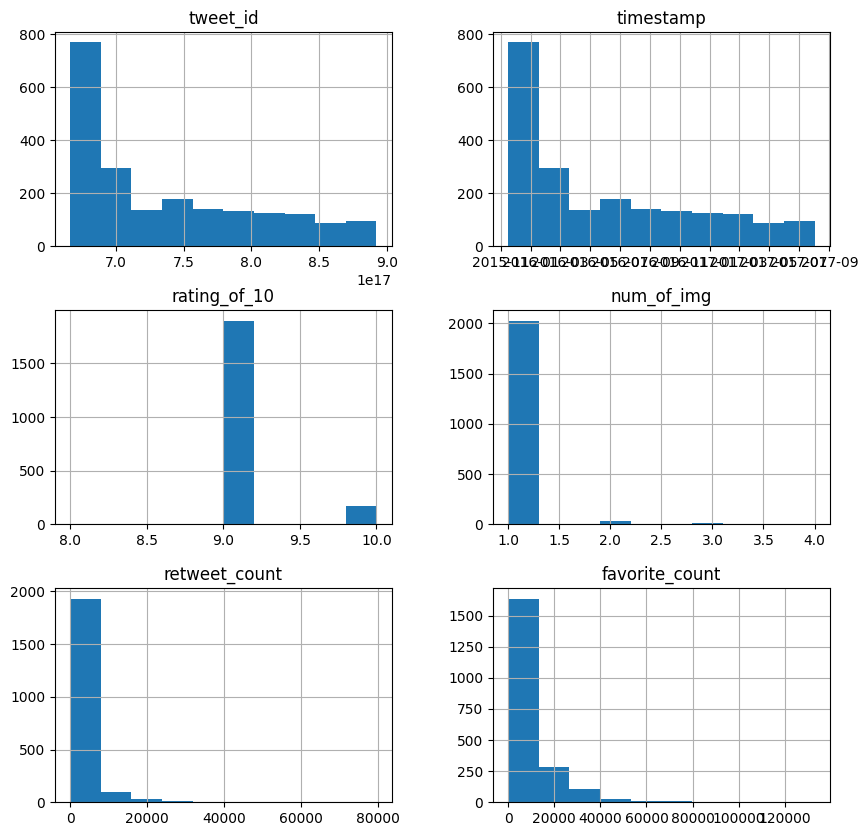

In [77]:
master_df.hist(figsize= (10,10))

In [78]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2073 non-null   int64              
 1   timestamp       2073 non-null   datetime64[ns, UTC]
 2   text            2073 non-null   object             
 3   expanded_urls   2073 non-null   object             
 4   rating_of_10    2073 non-null   int64              
 5   name            2073 non-null   object             
 6   age             2073 non-null   object             
 7   jpg_url         2073 non-null   object             
 8   num_of_img      2073 non-null   int64              
 9   prediction1     2073 non-null   object             
 10  prediction2     2073 non-null   object             
 11  prediction3     2073 non-null   object             
 12  retweet_count   2073 non-null   int64              
 13  favorite_count  2073 non-null   i

### Q1: what factors affect the favourites counts

<Axes: ylabel='favorite_count'>

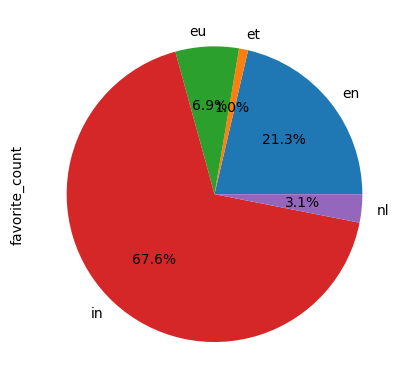

In [79]:
# create a pie chart to show the correlation between language and favorite_count
master_df.groupby('language')['favorite_count'].mean().plot(kind = 'pie', autopct = '%1.1f%%')

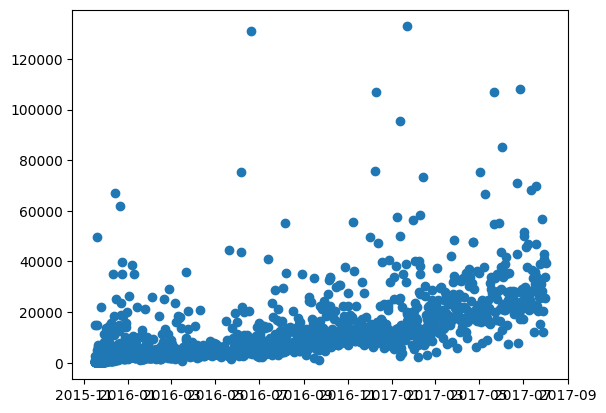

In [80]:
plt.scatter(master_df['timestamp'], master_df['favorite_count'])
#no strong correlation between the timestamp and the favourite counts

<Axes: xlabel='age'>

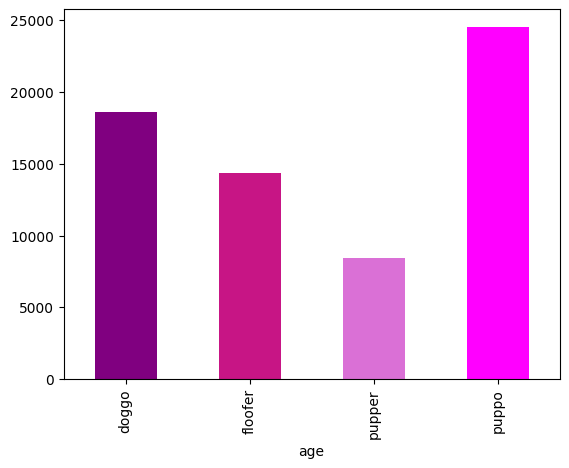

In [81]:
new_df = master_df[master_df['age'] != '__']
colours =['purple','mediumvioletred','orchid','fuchsia']
new_df.groupby('age')['favorite_count'].mean().plot(kind = 'bar' , color = colours)
#tweets with puppos are more popular and get higher favourite counts

#### A1:**From these charts, we can find that the main factor affecting the favourite counts is the age stage, as the age stage with favourite counts is puppo, and the lowest is pupper. Then the second factor is the language, as the Indonesian tweets get a higher number of favourites, however, only 7 tweets are written using different languages. The least factor is the timestamp, which shows a low correlation in the scatter plot**

### Q2: most and least common dog names

<Axes: title={'center': 'top5 common names'}, xlabel='name'>

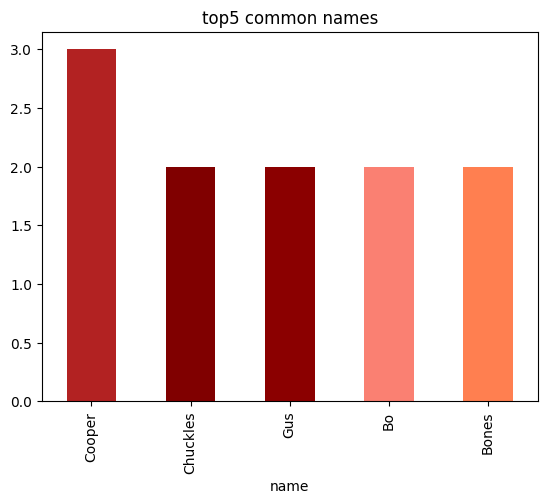

In [82]:
new_df = master_df[master_df['name'] != 'unknown']
colours = ['firebrick', 'maroon' ,'darkred' ,'salmon' , 'coral']
new_df['name'].value_counts().head().plot(kind = 'bar' , color = colours , title = 'top5 common names')

<Axes: title={'center': 'least5 common names'}, ylabel='count'>

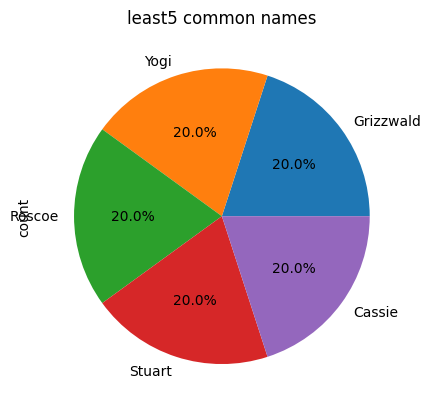

In [83]:
new_df['name'].value_counts().tail().plot(kind = 'pie', title = 'least5 common names' , autopct = '%1.1f%%')

#### A2: As shown in the bar, Cooper is a very common name in dogs, as many people prefer to give their dog that name. On the other hand, some names showed a lower percentage in the pie chart, like Cassie and Grizzwald

### Q3: most and least common dog age stages

<Axes: title={'center': 'top common age stages'}, xlabel='age'>

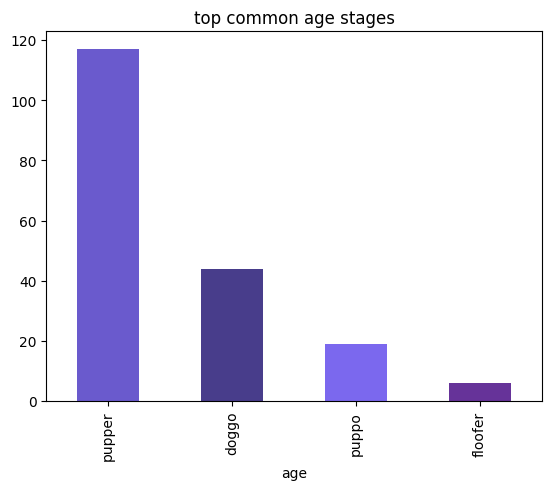

In [84]:
new_df = master_df[master_df['age'] != '__']
colours = ['slateblue','darkslateblue','mediumslateblue','rebeccapurple']
new_df['age'].value_counts().plot(kind = 'bar' , color = colours , title = 'top common age stages')
#the most common stage is the 'pupper' which means that people prefer to get puppers more than any other age stage

#### A3: From the bar chart above we can see that the most common stage for people to buy is the pupper and the least one is the floofer which means that people show more interest to get a pupper more than other age stages Which was the opposite of what was expected because in the bar chart that shows the correlation between the dog age stages and the favourite counts the puppers were the least in favourite counts